# Ejercicios Pair Programming - Modulo 3 - Sprint 1 
## Lección 15 - Regresión Logística IV: Métricas
### Pilar García y Sonia Ruiz Pérez

In [6]:
#Librerías
# Tratamiento de datos
import numpy as np
import pandas as pd
import sidetable

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Separación de datos en 'train' y 'test'
from sklearn.model_selection import train_test_split

# Método Regresión Logística
from sklearn.linear_model import LogisticRegression

# Matriz de confusión
from sklearn.metrics import confusion_matrix

# Métricas
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_curve, roc_auc_score

pd.options.display.max_columns=None

In [2]:
# Creamos un dataframe con los datos estandarizados y codificados
df_enco_esta = pd.read_csv("files/heart_eda_principal_encoding_estandar.csv", index_col=0)
df_enco_esta.head(3)

,age,resting_bp,cholesterol,fasting_bs,max_hr,oldpeak,heart_disease,male,chest_pain_type_ASY,chest_pain_type_ATA,chest_pain_type_NAP,chest_pain_type_TA,resting_ecg_LVH,resting_ecg_Normal,resting_ecg_ST,exercise_angina_yes,st_slope_Down,st_slope_Flat,st_slope_Up
0,-1.334331,0.548422,0.984547,-0.44069,1.290461,-0.864955,0,1,0,1,0,0,0,1,0,0,0,0,1
1,-0.390470,1.845686,-1.182352,-0.44069,0.633456,0.178110,1,0,0,0,1,0,0,1,0,0,0,1,0
2,-1.648952,-0.100209,0.865268,-0.44069,-1.748185,-0.864955,0,1,0,1,0,0,0,0,1,0,0,0,1


In [3]:
# Creamos un dataframe con los datos codificados
df_enco = pd.read_csv("files/heart_eda_principal_encoding.csv", index_col=0)
df_enco.head(3)

,age,resting_bp,cholesterol,fasting_bs,max_hr,oldpeak,heart_disease,male,chest_pain_type_ASY,chest_pain_type_ATA,chest_pain_type_NAP,chest_pain_type_TA,resting_ecg_LVH,resting_ecg_Normal,resting_ecg_ST,exercise_angina_yes,st_slope_Down,st_slope_Flat,st_slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,0,0,0,1


En el ejercicio de pair programming anterior ajustastéis vuestro primer modelito de regresión logística. Ahora es el momento de saber como de bueno es nuestro modelo. Para esto, los objetivos del pair de hoy son:
- Calculad las métricas para vuestro modelo

`Datos solo codificados.`

In [4]:
# Separamos los datos en X e y, primero con los datos solo codificados
X1 = df_enco.drop("heart_disease", axis=1)
y1 = df_enco["heart_disease"]

# Separamos en train y test
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Definimos la regresión logistica
log_reg1 = LogisticRegression(n_jobs=-1, max_iter=100)

# Ajustar el modelo
log_reg1.fit(x1_train, y1_train)

# Obtenemos las predicciones para entrenamiento
y1_pred_train = log_reg1.predict(x1_train)

# Obtenemos las predicciones para test
y1_pred_test = log_reg1.predict(x1_test)

# Creamos un dataframe para visualizar mejor los datos predichos
df1_train = pd.DataFrame({'Real': y1_train, "Predicho": y1_pred_train, "Set": ["Train"]*len(y1_train)})
df1_test = pd.DataFrame({'Real': y1_test, "Predicho": y1_pred_test, "Set": ["Test"]*len(y1_test)})
df1_resultados = pd.concat([df1_train, df1_test], axis=0)
df1_resultados.head()

/home/pilar/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Real,Predicho,Set
165,1,1,Train
542,0,0,Train
284,1,1,Train
360,1,1,Train
110,1,1,Train


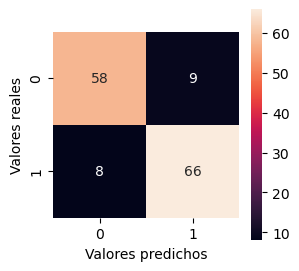

In [5]:
# Matriz de correlación con los datos solo codificados
matriz1 = confusion_matrix(y1_test, y1_pred_test)

plt.figure(figsize=(3,3))
sns.heatmap(matriz1, square=True, annot=True, fmt="d", cmap="rocket")
# square: forma cuadradada, annot: etiqueta número registros, fmt: para formato etiqueta, número entero
plt.xlabel("Valores predichos")
plt.ylabel("Valores reales")
plt.show()

In [8]:
# Creamos una función para las métricas del modelo de regresión logistica.
def obtener_metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    resultados = {
        'accuracy': [accuracy_score(y_test, y_test_pred), accuracy_score(y_train, y_train_pred)],
        'precision': [precision_score(y_test, y_test_pred), precision_score(y_train, y_train_pred)], 
        'recall': [recall_score(y_test, y_test_pred), recall_score(y_train, y_train_pred)],
        'f1': [f1_score(y_test, y_test_pred), f1_score(y_train, y_train_pred)],
        'kappa': [cohen_kappa_score(y_test, y_test_pred), cohen_kappa_score(y_train, y_train_pred)],
        "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [9]:
# Llamamos a la función.
df1_resultado = obtener_metricas(y1_test, y1_train, y1_pred_test, y1_pred_train, "Regresión Logística Codificadas")
df1_resultado

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.879433,0.880000,0.891892,0.885906,0.758099,test,Regresión Logística Codificadas
1,0.857143,0.832031,0.852000,0.841897,0.711637,train,Regresión Logística Codificadas


`Datos codificados y estandarizados.`

In [11]:
# Separamos los datos en X e y, primero con los datos codificados y estandarizadas.
X2 = df_enco_esta.drop("heart_disease", axis=1)
y2 = df_enco_esta["heart_disease"]

# Separamos en train y test
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Definimos la regresión logistica
log_reg2 = LogisticRegression(n_jobs=-1, max_iter=100)

# Ajustar el modelo
log_reg2.fit(x2_train, y2_train)

# Obtenemos las predicciones para entrenamiento
y2_pred_train = log_reg2.predict(x2_train)

# Obtenemos las predicciones para test
y2_pred_test = log_reg2.predict(x2_test)

# Creamos un dataframe para visualizar mejor los datos predichos
df2_train = pd.DataFrame({'Real': y2_train, "Predicho": y2_pred_train, "Set": ["Train"]*len(y2_train)})
df2_test = pd.DataFrame({'Real': y2_test, "Predicho": y2_pred_test, "Set": ["Test"]*len(y2_test)})
df2_resultados = pd.concat([df2_train, df2_test], axis=0)
df2_resultados.head()

,Real,Predicho,Set
165,1,1,Train
542,0,0,Train
284,1,1,Train
360,1,1,Train
110,1,1,Train


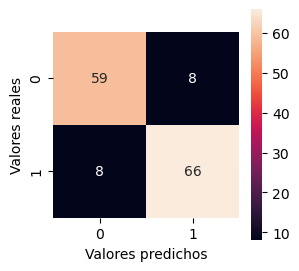

In [12]:
# Matriz de correlación 
matriz2 = confusion_matrix(y2_test, y2_pred_test)

plt.figure(figsize=(3,3))
sns.heatmap(matriz2, square=True, annot=True, cmap="rocket")
plt.xlabel("Valores predichos")
plt.ylabel("Valores reales")
plt.show()

In [13]:
# Llamamos a la función.
df2_resultado = obtener_metricas(y2_test, y2_train, y2_pred_test, y2_pred_train, "Regresión Logística Codificadas y Estandarizadas")
df2_resultado

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.886525,0.891892,0.891892,0.891892,0.772489,test,Regresión Logística Codificadas y Estandarizadas
1,0.860714,0.838583,0.852000,0.845238,0.718629,train,Regresión Logística Codificadas y Estandarizadas


- Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?

In [10]:
# dataframe con los resultados de las métricas del modelo con las variables codificadas
df1_resultado

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.879433,0.880000,0.891892,0.885906,0.758099,test,Regresión Logística Codificadas
1,0.857143,0.832031,0.852000,0.841897,0.711637,train,Regresión Logística Codificadas


`Los resultados obtenidos en los datos solo codificados son:`
- `accuracy (exactitud): nuestro modelo nos indica que el 88% de los valores predichos están bien predichos.`
- `precision: nuestro modelo nos indica que el 88% de las predicciones positivas (tienen fallo cardiaco) fueron correctas. `
- `recall (sensibilidad o exhaustividad): nuestro modelo nos indica que el 89% de los casos positivos fueron capturados. De las personas con fallo cardiaco sólo se han detectado el 89%.`
- `f1: media de la precision y recall, su interpretación es que cuanto más cercano a 1 esté su valor, mejor es nuestro modelo a la hora de hacer sus predicciones.`
- `kappa: concordancia, nuestro modelo tiene una buena concordancia, ya que un valor de 0.76 indica que no hace sus predicciones por azar. `

` Con estas métricas nuestro modelo es bastante bueno en general.`

` La diferencia entre los datos de train y test no llegan a superar el 5% por lo que no estaríamos ante un caso ni de overfitting ni de underfitting. En algún caso los datos de test son ligeramente mejores (underfitting).`

In [14]:
# dataframe con los resultados de las métricas del modelo con las variables codificadas y estandarizadas
df2_resultado

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.886525,0.891892,0.891892,0.891892,0.772489,test,Regresión Logística Codificadas y Estandarizadas
1,0.860714,0.838583,0.852000,0.845238,0.718629,train,Regresión Logística Codificadas y Estandarizadas


`Los resultados obtenidos en las métricas del modelo con los datos codificados y estandarizados son muy similares a los obtenidos en las métricas de los datos solo codificados. En train no hay apenas diferencia y en test solo incrementariamos un 0.01%.`
`A la hora de escoger, nos quedaríamos con el modelo obtenido con los datos codificados y estandarizados, ya que la kappa tiene un valor mayor y nuestras predicciones se deben aún menos al azar.`

In [16]:
# Unimos los dos dataframes de resultados
df_resultado = pd.concat([df1_resultado, df2_resultado], axis=0)
df_resultado

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.879433,0.880000,0.891892,0.885906,0.758099,test,Regresión Logística Codificadas
1,0.857143,0.832031,0.852000,0.841897,0.711637,train,Regresión Logística Codificadas
0,0.886525,0.891892,0.891892,0.891892,0.772489,test,Regresión Logística Codificadas y Estandarizadas
1,0.860714,0.838583,0.852000,0.845238,0.718629,train,Regresión Logística Codificadas y Estandarizadas


In [17]:
# Guardamos los resultados de las métricas de la Regresión Logística en formato csv
df_resultado.to_csv("files/resultados_heart_logisticareg.csv")

Happy coding 📊📈📉